**`Introduction`** Let $T_n$ be an estimator of $\theta$, and now we consider the estimator of the parameter $f(\theta)$ where $f$ be a continuous function. A `natural estimator` of $f(\theta)$ is $f(T_n)$, and do you know
the assymptotic properties of $f(T_n)$.

- The `Delta method` consists of using a Taylor expansion to approximate a random vector of the form $ f(T_n) $ by the polynomial 

$$ \text{poly}_n(T_n - \theta) = f(\theta) + f'(\theta) (T_n - \theta) $$ 

It is a simple but useful method to deduce the limit law of $f(T_n) - f(\theta)$ from that $T_n - \theta$. 

1) In case $f$ be `linear`, if $\sqrt{n} \left( T_n - \theta \right) \to X$ then $\sqrt{n} \left( f(T_n) - f(\theta) \right) \to f(X)$ 

2) Otherwise, we will consider if $f$ be a `differentible` function?? See Theorem 1.

3) If $f'(\theta) = 0$?? See Theorem 2 in `Example 2` of this file

***Theorem 1.*** `[See / Ref : VanderVaart, chapter3]` Let $f: \mathbb{R}^k \to \mathbb{R}^m$  be a function defined on a subset of $\mathbb{R}^k$ and $f$ be differentiable at some $\theta \in \Theta \subset \mathbb{R}^k$. Let $T_n$ be random vectors  taking their values in the domain of $f$. For a sequence $r_n \to \infty$; if 

$$ r_n \left( T_n - \theta \right) \to X $$

then

$$ r_n \left( f(T_n) - f(\theta) \right) \to f'_{\theta}(X). $$

***Application in C.L.T (central limit theorem).***
Let $X_1, \ldots, X_n$ be i.i.d rvs with the finite variance, and the statistical $$T_n = T(X_1, \ldots, X_n)$$ be an estimator of the parameter $\theta$.

Let $f$ be a differentiable at $\theta$ and suppose that 

$$ \sqrt{n} (T_n - \theta) \to \mathcal{N}(0, \Sigma) $$

then

$$ \sqrt{n} (f(T_n) - f(\theta) ) \to \mathcal{N}(0, D_f(\theta) \Sigma D_f^T(\theta)) $$

**Example 1**, Let $X_1, \ldots, X_n$ be the i.i.d random variable of the Bernoulli $\mathcal{B}(1, p)$ with $p = 0.5 \in (0, 1)$.

Find the assymptotic distribution of $\sqrt{n} \bar{X_n}^3$ where

$$ \bar{X_n} = n^{-1} \sum_{k=1}^n X_k $$

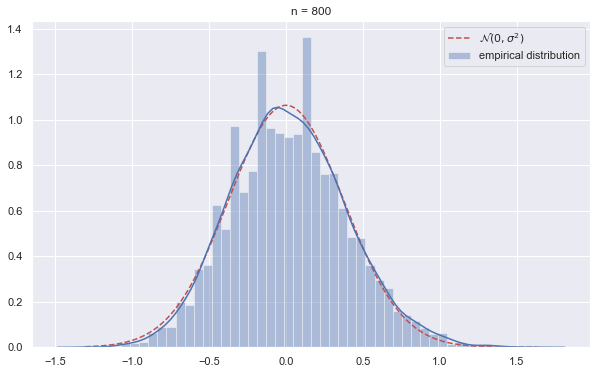

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

n = 800
p = 0.5

## define a function
def func(t):
    return(t**3)

def sample(n, p):
    x_bar = 0
    for k in range(n):
        x_k = np.random.binomial(1, p, 10000)
        x_bar = x_bar + (x_k / n)
    return(x_bar)

s = np.sqrt(n)*(func(sample(n, p)) - func(p) )

## Calculate the standard_deviation
sigma = np.sqrt(0.5*0.5*0.75*0.75)

## fit the range of empirical and true density
x = np.linspace(min(s), max(s), len(s))

sns.set(rc = {"figure.figsize" : (10, 6)})
plt.plot(x, norm.pdf(x, 0, sigma), 'r--', label = '$\mathcal{N}(0, \sigma^2)$')
sns.distplot(s, norm_hist=True, kde=True, label = 'empirical distribution')
plt.title('n = '+ str(n))
plt.legend()
plt.show()

**Explain the example 1.**

We have $\mathbb{E}X_1 = p$ and Var$X_1 = p(1- p)$

By SLLN, it is easy to see that

$$\sqrt{n} \left( \bar{X_n} - p \right) \to \mathcal{N}(0, p(1-p)) $$

By `Delta method`, with $f(x) = x^3$ and $\theta = p = 0.5$ then 

$$D_f(\theta) = f'(\theta) = 3 \theta^2 = 0.75; $$

so we have

$$\sqrt{n} \left( \bar{X_n}^3 - p^3 \right) \to \mathcal{N}(0, D_f(p) * p(1-p) * D_f(p) ) = \mathcal{N}(0, 0.140625) $$

**Check again with $n = 8\times10^5$ & compare to** $\mathcal{N}(0, 0.140625)$

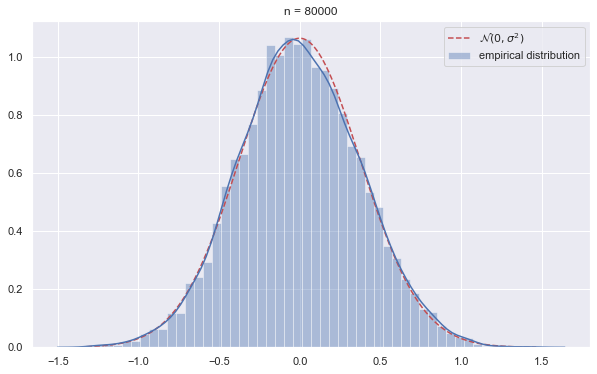

In [2]:
n = 80000

s = np.sqrt(n)*(func(sample(n, p)) - func(p) )

x = np.linspace(min(s), max(s), len(s))

sns.set(rc = {"figure.figsize" : (10, 6)})
plt.plot(x, norm.pdf(x, 0, sigma), 'r--', label = '$\mathcal{N}(0, \sigma^2)$')
sns.distplot(s, norm_hist = True, kde = True, label = 'empirical distribution')
plt.title('n = '+ str(n))
plt.legend()
plt.show()

Now, the `empirical distribution` almostly fit the `true_distribution` $\mathcal{N}(0, \sigma^2)$ when $n$ large enough.

**`Example 2.`** How about the assymptotic properties of the `variance = p(1-p)`, that is

$$ \bar{X_n} \left( 1 - \bar{X_n} \right) $$ 

- Case 1: If $p \neq \frac{1}{2}$ then in this case for $f(x) = x(1 - x)$ we have

$$D_f(\theta) = 1 - 2\theta \neq 0$$

and hence

$$ \sqrt{n} (f(\bar{X_n}) - f(\theta)) \to \mathcal{N} \left( 0, p(1-p)(1 - 2p)^2 \right) $$

- Case 2: $p = \frac{1}{2}$ Obviously, $\theta = p = 0.5$ then $f'(\theta) = 1 - 2\theta = 0$, which implies the varicance equal to 0 if we apply `Theorem 1`. 

- Hence, the `Delta method` in `Theorem 1` can be improved to another version; that is if $f$ is twice differentiable with $f"(\theta) \neq 0$; the Taylor expansion of $f$ can be express as 

$$ f(T_n) = f(\theta) + (T_n - \theta) f'(\theta) + \frac{1}{2} (T_n - \theta)^2 f^{''}(\theta) + o_p \left( \Vert T_n - \theta \Vert^2 \right),$$

if $f'(\theta) = 0$, then we get

$$ r_n \left( f(T_n) - f(\theta) \right) = \frac{r_n}{2} (T_n - \theta)^2 f^{''}(\theta) + o_p \left( r_n \Vert T_n - \theta \Vert^2 \right)$$

So we get `Theorem 2.`

**`Theorem 2.`** Let $f: \mathbb{R}^k \to \mathbb{R}^m$  be a function defined on a subset of $\mathbb{R}^k$ and $f$ be twice differentiable at some $\theta \in \Theta \subset \mathbb{R}^k$. Let $T_n$ be random vectors  taking their values in the domain of $f$. Suppose that $f^{''}(\theta) \neq 0$; for a sequence $r_n \to \infty$; if 

$$ r_n^{1/2} \left( T_n - \theta \right) \to \mathcal{N} \left( 0, \sigma^2(\theta) \right), $$

then

$$ r_n \left( T_n - \theta \right)^2 \to \sigma^2(\theta) \chi_1^2 ; $$

and

$$ r_n \left( f(T_n) - f(\theta) \right) \to \frac{1}{2} \sigma^2(\theta) f^{''}(\theta) \chi_1^2 . $$


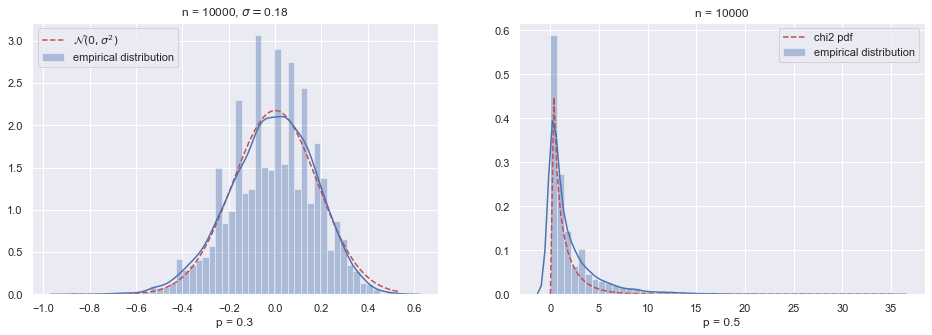

In [7]:
from scipy.stats import chi2

n = 10000

sns.set(rc = {"figure.figsize" : (16, 5)})

## define a function
def func(t):
    return(t*(1 - t))

def sample(n, p):
    x_bar = 0
    for k in range(n):
        x_k = np.random.binomial(1, p, 10000)
        x_bar = x_bar + (x_k / n)
    return(x_bar)

## 1) Left panel
p1 = 0.3
s1 = np.sqrt(n)*( func(sample(n, p1) ) - func(p1) )
sigma = np.sqrt(p1 * (1 - p1) * (1 - 2*p1 )**2)

## 2) Right panel
df = 1   ## degree of freedom
p2 = 0.5
s2 = -8 * n * (func(sample(n, p2)) - p2 * (1 - p2) )
x2 = np.linspace(-chi2.ppf(0.001, df), max(s2), 100)

## display the graph of assymptotic
plt.subplot(121)
x1 = np.linspace(min(s1), max(s1), len(s1))
plt.plot(x1, norm.pdf(x1, 0, sigma), 'r--', label = '$\mathcal{N}(0, \sigma^2)$')
sns.distplot(s1, norm_hist = True, kde = True, label = 'empirical distribution')
plt.title('n = '+ str(n) + ', $\sigma = $' + str(round(sigma, 2)) )
plt.xlabel('p = '+str(p1))
plt.legend()

plt.subplot(122)
plt.plot(x2, chi2.pdf(x2, df), 'r--', label = 'chi2 pdf')
sns.distplot(s2, label = 'empirical distribution')
plt.title('n = '+ str(n))
plt.xlabel('p = '+str(p2))
plt.legend()
plt.show()

**Explain.** Note that

- On the left panel; $p = 0.3$ so $\sigma^2 = p(1-p)(1-p)^2 = 0.00336$ and

$$ \sqrt{n} \left( \bar{X_n} (1 - \bar{X_n}) - p(1-p) \right) \to \mathcal{N}(0, \sigma^2) $$

- On the right panel; $\sigma^2(\theta) = p(1-p) = 0.25$ and $f^{''}(\theta) = -2$, hence

$$ n(\bar{X_n} (1 - \bar{X_n}) - p(1-p) ) \to - \frac{1}{4} \chi^2_1 $$

or

$$ -4n(\bar{X_n} \left( 1 - \bar{X_n}) - p(1-p) \right) \to \chi^2_1 $$